# Homework - Paul Bichl & Leo Traußnigg
## Data from acutal Smart Home - PV power and UV radiation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def read_sensor_data(file_path):
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print(f"Error reading the file: {e}")
        return None

In [15]:
# plot dat from csv file
def plot_sensor_data(data):
    if data['state'] is not None:
        data['state'].plot()
        plt.title('Sensor Data')
        plt.xlabel('Time')
        plt.ylabel(data['entity_id'][0])
        plt.show()
    else:
        print("No data to plot.")

In [11]:
def clean_data(data):

    try: 
        data['last_changed'] = pd.to_datetime(data['last_changed'])
        
        # Define cutoff timestamp
        cutoff = pd.Timestamp('2025-03-21T12:00:00.000Z')
        
        # Filter the data: keep rows where last_changed >= cutoff
        data = data[data["last_changed"] >= cutoff].reset_index(drop=True)
        
        # Remove rows where 'state' is 'unknown' or 'unavailable'
        data = data[~data["state"].isin(["unknown", "unavailable"])].reset_index(drop=True)

        data['state'] = data['state'].astype('float')
        
        return data
    except Exception as e:
        print(f"Error cleaning data: {e}")
        return None

sensor.easyweatherpro_v5_0_2_solar_radiation


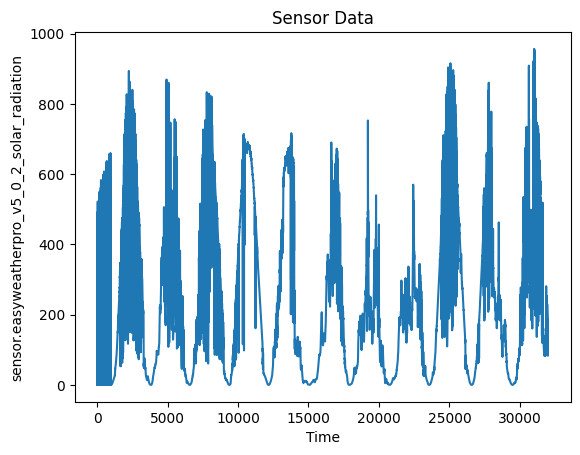

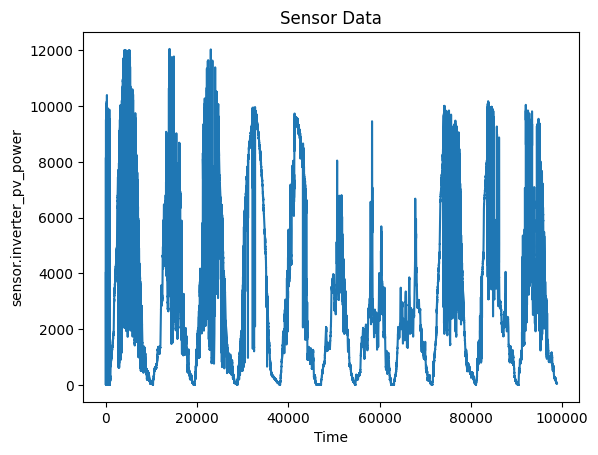

In [17]:
radiation_data = read_sensor_data('data/radiation-history.csv')
pv_data = read_sensor_data('data/pw-power-history.csv')

radiation_data = clean_data(radiation_data)
pv_data = clean_data(pv_data)

print(radiation_data['entity_id'][0])

plot_sensor_data(radiation_data)
plot_sensor_data(pv_data)

                                    entity_id_rad   state_rad  \
0    sensor.easyweatherpro_v5_0_2_solar_radiation  331.278454   
1    sensor.easyweatherpro_v5_0_2_solar_radiation  176.193025   
2    sensor.easyweatherpro_v5_0_2_solar_radiation   89.553914   
3    sensor.easyweatherpro_v5_0_2_solar_radiation   25.244496   
4    sensor.easyweatherpro_v5_0_2_solar_radiation    0.839647   
..                                            ...         ...   
842  sensor.easyweatherpro_v5_0_2_solar_radiation   50.864346   
843  sensor.easyweatherpro_v5_0_2_solar_radiation   99.984317   
844  sensor.easyweatherpro_v5_0_2_solar_radiation   33.055080   
845  sensor.easyweatherpro_v5_0_2_solar_radiation    3.529434   
846  sensor.easyweatherpro_v5_0_2_solar_radiation    0.000000   

                 last_changed              entity_id_pv     state_pv  
0   2025-03-21 13:00:00+00:00  sensor.inverter_pv_power  4016.370086  
1   2025-03-21 14:00:00+00:00  sensor.inverter_pv_power  1630.593871  
2   20

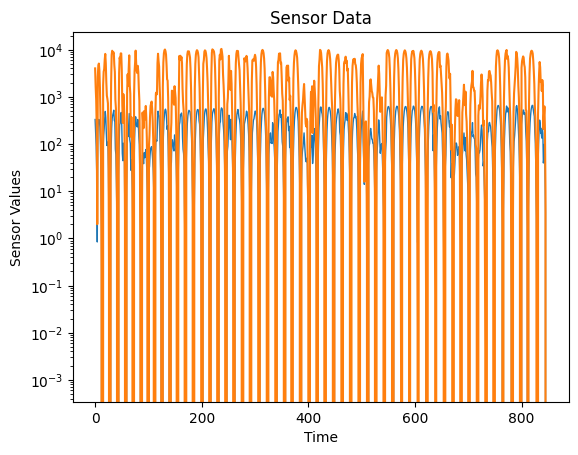

In [29]:
merged_data = pd.merge(radiation_data, pv_data, on='last_changed', suffixes=('_rad', '_pv'))
#merged_data[entity_id_rad].drop

print(merged_data)

plt.semilogy(merged_data['state_rad'], linewidth='1')
plt.semilogy(merged_data['state_pv'])
#radiation_data['state'].astype('float').plot()
#pv_data['state'].astype('float').plot()
plt.title('Sensor Data')
plt.xlabel('Time')
plt.ylabel('Sensor Values')
plt.show()